# Fundamental Analysis Demonstration

This notebook demonstrates the usage of the `FundamentalAnalyzer` class for evaluating company financial health and metrics.

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Any

# Add project root to path to allow imports
sys.path.append('../..')

from tumkwe_invest.data_analysis.fundamental_analysis import FundamentalAnalyzer

## Sample Financial Data

Let's create sample financial data for two companies to demonstrate fundamental analysis.

In [2]:
# Sample financial data for a healthy company
healthy_company = {
    "company_name": "HealthyCorp",
    "current_price": 150.0,
    "earnings_per_share": 7.5,  # P/E ratio = 20
    "total_debt": 2000000000,
    "total_equity": 8000000000,  # D/E ratio = 0.25
    "net_income": 1000000000,  # ROE = 12.5%
    "current_assets": 3000000000,
    "current_liabilities": 1500000000,  # Current ratio = 2.0
    "revenue": 5000000000,  # Profit margin = 20%
}

# Sample financial data for a struggling company
struggling_company = {
    "company_name": "StrugglingCorp",
    "current_price": 45.0,
    "earnings_per_share": 1.5,  # P/E ratio = 30
    "total_debt": 4000000000,
    "total_equity": 2000000000,  # D/E ratio = 2.0
    "net_income": 150000000,  # ROE = 7.5%
    "current_assets": 800000000,
    "current_liabilities": 700000000,  # Current ratio = 1.14
    "revenue": 3000000000,  # Profit margin = 5%
}

# Industry benchmark data
industry_benchmarks = {
    "pe_ratio": 22.0,
    "debt_to_equity": 0.8,
    "return_on_equity": 10.0,
    "current_ratio": 1.5,
    "profit_margin": 12.0,
}

## Analyzing the Healthy Company

Let's analyze the financial health of our first company using the FundamentalAnalyzer.

In [3]:
# Initialize analyzer for the healthy company
healthy_analyzer = FundamentalAnalyzer(
    financial_data=healthy_company, 
    industry_benchmarks=industry_benchmarks
)

# Calculate all metrics
healthy_metrics = healthy_analyzer.calculate_all_metrics()

# Display calculated metrics
print(f"Financial Metrics for {healthy_company['company_name']}:")
for metric, value in healthy_metrics.items():
    print(f"{metric}: {value:.2f}")

Financial Metrics for HealthyCorp:
pe_ratio: 20.00
debt_to_equity: 0.25
return_on_equity: 12.50
current_ratio: 2.00
profit_margin: 20.00


In [4]:
# Compare with industry benchmarks
healthy_benchmarks = healthy_analyzer.benchmark_metrics()

# Display benchmark comparisons
print(f"\nBenchmark Comparisons for {healthy_company['company_name']}:")
for metric, details in healthy_benchmarks.items():
    print(f"\n{metric.upper()}:")
    print(f"  Company Value: {details['company_value']:.2f}")
    print(f"  Industry Average: {details['industry_average']:.2f}")
    print(f"  Difference: {details['percent_difference']:.2f}%")
    print(f"  Performance: {details['performance']}")


Benchmark Comparisons for HealthyCorp:

PE_RATIO:
  Company Value: 20.00
  Industry Average: 22.00
  Difference: -9.09%
  Performance: better

DEBT_TO_EQUITY:
  Company Value: 0.25
  Industry Average: 0.80
  Difference: -68.75%
  Performance: better

RETURN_ON_EQUITY:
  Company Value: 12.50
  Industry Average: 10.00
  Difference: 25.00%
  Performance: better

CURRENT_RATIO:
  Company Value: 2.00
  Industry Average: 1.50
  Difference: 33.33%
  Performance: better

PROFIT_MARGIN:
  Company Value: 20.00
  Industry Average: 12.00
  Difference: 66.67%
  Performance: better


In [5]:
# Assess valuation
healthy_valuation = healthy_analyzer.assess_valuation()

print(f"\nValuation Assessment for {healthy_company['company_name']}:")
print(f"Assessment: {healthy_valuation['assessment']}")
print(f"Confidence: {healthy_valuation['confidence']}")
print("\nKey Factors:")
for factor, description in healthy_valuation['factors'].items():
    print(f"  - {factor}: {description}")


Valuation Assessment for HealthyCorp:
Assessment: potentially undervalued
Confidence: 0.5

Key Factors:
  - debt_to_equity: low debt levels


## Analyzing the Struggling Company

Now let's analyze the financial health of our second company.

In [6]:
# Initialize analyzer for the struggling company
struggling_analyzer = FundamentalAnalyzer(
    financial_data=struggling_company, 
    industry_benchmarks=industry_benchmarks
)

# Calculate all metrics
struggling_metrics = struggling_analyzer.calculate_all_metrics()

# Display calculated metrics
print(f"Financial Metrics for {struggling_company['company_name']}:")
for metric, value in struggling_metrics.items():
    print(f"{metric}: {value:.2f}")

Financial Metrics for StrugglingCorp:
pe_ratio: 30.00
debt_to_equity: 2.00
return_on_equity: 7.50
current_ratio: 1.14
profit_margin: 5.00


In [7]:
# Compare with industry benchmarks
struggling_benchmarks = struggling_analyzer.benchmark_metrics()

# Display benchmark comparisons
print(f"\nBenchmark Comparisons for {struggling_company['company_name']}:")
for metric, details in struggling_benchmarks.items():
    print(f"\n{metric.upper()}:")
    print(f"  Company Value: {details['company_value']:.2f}")
    print(f"  Industry Average: {details['industry_average']:.2f}")
    print(f"  Difference: {details['percent_difference']:.2f}%")
    print(f"  Performance: {details['performance']}")


Benchmark Comparisons for StrugglingCorp:

PE_RATIO:
  Company Value: 30.00
  Industry Average: 22.00
  Difference: 36.36%
  Performance: worse

DEBT_TO_EQUITY:
  Company Value: 2.00
  Industry Average: 0.80
  Difference: 150.00%
  Performance: worse

RETURN_ON_EQUITY:
  Company Value: 7.50
  Industry Average: 10.00
  Difference: -25.00%
  Performance: worse

CURRENT_RATIO:
  Company Value: 1.14
  Industry Average: 1.50
  Difference: -23.81%
  Performance: worse

PROFIT_MARGIN:
  Company Value: 5.00
  Industry Average: 12.00
  Difference: -58.33%
  Performance: worse


In [8]:
# Assess valuation
struggling_valuation = struggling_analyzer.assess_valuation()

print(f"\nValuation Assessment for {struggling_company['company_name']}:")
print(f"Assessment: {struggling_valuation['assessment']}")
print(f"Confidence: {struggling_valuation['confidence']}")
print("\nKey Factors:")
for factor, description in struggling_valuation['factors'].items():
    print(f"  - {factor}: {description}")


Valuation Assessment for StrugglingCorp:
Assessment: neutral
Confidence: 0

Key Factors:


## Visualizing the Differences

Let's create some visualizations to compare the financial health of both companies.

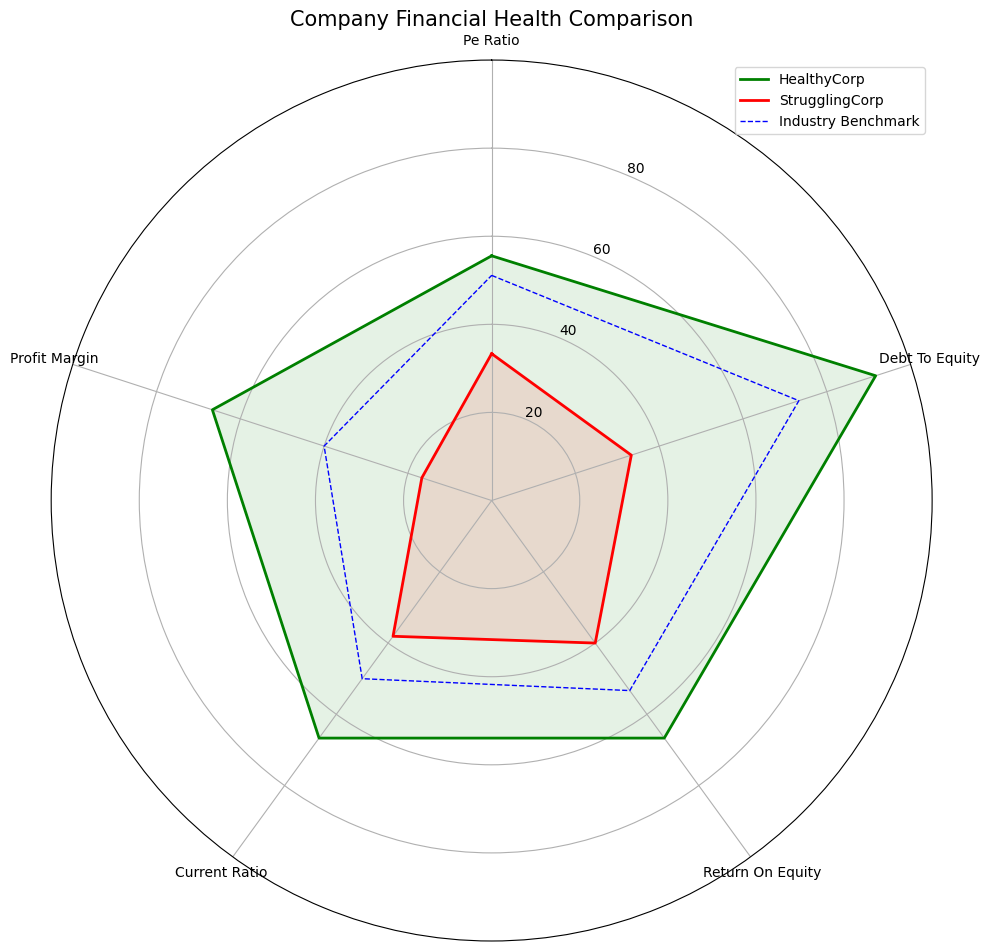

In [9]:
# Extract metrics for visualization
metrics = ['pe_ratio', 'debt_to_equity', 'return_on_equity', 'current_ratio', 'profit_margin']
healthy_values = [healthy_metrics[m] for m in metrics]
struggling_values = [struggling_metrics[m] for m in metrics]
benchmark_values = [industry_benchmarks[m] for m in metrics]

# For better visualization, normalize debt_to_equity and pe_ratio so lower is better for all metrics
for i, metric in enumerate(metrics):
    if metric in ['pe_ratio', 'debt_to_equity']:
        # Normalize to 0-100 range where 100 is best (lowest D/E and P/E)
        max_val = max(healthy_values[i], struggling_values[i], benchmark_values[i]) * 1.5
        healthy_values[i] = 100 * (1 - healthy_values[i]/max_val)
        struggling_values[i] = 100 * (1 - struggling_values[i]/max_val)
        benchmark_values[i] = 100 * (1 - benchmark_values[i]/max_val)
    else:
        # Normalize to 0-100 range where 100 is best (highest positive value)
        max_val = max(healthy_values[i], struggling_values[i], benchmark_values[i]) * 1.5
        healthy_values[i] = 100 * healthy_values[i]/max_val
        struggling_values[i] = 100 * struggling_values[i]/max_val
        benchmark_values[i] = 100 * benchmark_values[i]/max_val

# Convert metrics names to more readable format
metric_labels = [m.replace('_', ' ').title() for m in metrics]

# Create radar chart
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # close the polygon

healthy_values += healthy_values[:1]
struggling_values += struggling_values[:1]
benchmark_values += benchmark_values[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.plot(angles, healthy_values, 'g-', linewidth=2, label=healthy_company['company_name'])
ax.fill(angles, healthy_values, 'g', alpha=0.1)
ax.plot(angles, struggling_values, 'r-', linewidth=2, label=struggling_company['company_name'])
ax.fill(angles, struggling_values, 'r', alpha=0.1)
ax.plot(angles, benchmark_values, 'b--', linewidth=1, label='Industry Benchmark')

ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metric_labels)

# Set y axis limits
ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80])
ax.set_yticklabels(['20', '40', '60', '80'])

plt.legend(loc='upper right')
plt.title('Company Financial Health Comparison', size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we've demonstrated how to use the FundamentalAnalyzer class to:

1. Calculate key financial metrics including:
   - Price-to-Earnings Ratio
   - Debt-to-Equity Ratio
   - Return on Equity
   - Current Ratio
   - Profit Margin

2. Benchmark these metrics against industry averages

3. Assess company valuation based on these metrics

4. Visualize financial health compared to competitors and industry standards

This fundamental analysis provides valuable insights into company financial health and potential investment value.